In [1]:
#Importing necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

### #Clustering:

#### Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000

CPC = Total Cost (spend) / Number of Clicks

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100

##### The Data Dictionary and the detailed description of the formulas for CPM, CPC and CTR are given in the sheet 2 of the Clustering Clean Ads_Data1 Excel File. 

In [2]:
#Importing Excel File to Notebook
df_cluster = pd.read_excel('Clustering Clean Ads_Data.xlsx')

#### #Part 1 - Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [3]:
#Top 5 rows :
df_cluster.head(5).T

,0,1,2,3,4
Timestamp,2020-9-2-17,2020-9-2-18,2020-9-3-16,2020-9-3-2,2020-9-3-13
InventoryType,Format1,Format1,Format6,Format1,Format1
Ad - Length,300,300,336,300,300
Ad- Width,250,250,250,250,250
Ad Size,75000,75000,84000,75000,75000
Ad Type,Inter222,Inter223,Inter217,Inter224,Inter225
Platform,Video,Web,Web,Web,Video
Device Type,Desktop,Mobile,Desktop,Desktop,Mobile
Format,Display,Display,Video,Display,Display
Available_Impressions,1806,1979,1566,643,1550


In [4]:
#Bottom 5 rows :
df_cluster.tail(5).T

,25852,25853,25854,25855,25856
Timestamp,2020-10-1-5,2020-11-18-2,2020-9-14-0,2020-9-30-4,2020-10-17-3
InventoryType,Format5,Format4,Format5,Format7,Format5
Ad - Length,720,120,720,300,720
Ad- Width,300,600,300,600,300
Ad Size,216000,72000,216000,180000,216000
Ad Type,Inter222,inter230,Inter221,Inter228,Inter225
Platform,Video,Video,App,Video,Video
Device Type,Desktop,Mobile,Mobile,Mobile,Mobile
Format,Video,Video,Video,Display,Display
Available_Impressions,1,7,2,1,1


In [5]:
#Dataframe info 
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              25857 non-null  object 
 1   InventoryType          25857 non-null  object 
 2   Ad - Length            25857 non-null  int64  
 3   Ad- Width              25857 non-null  int64  
 4   Ad Size                25857 non-null  int64  
 5   Ad Type                25857 non-null  object 
 6   Platform               25857 non-null  object 
 7   Device Type            25857 non-null  object 
 8   Format                 25857 non-null  object 
 9   Available_Impressions  25857 non-null  int64  
 10  Matched_Queries        25857 non-null  int64  
 11  Impressions            25857 non-null  int64  
 12  Clicks                 25857 non-null  int64  
 13  Spend                  25857 non-null  float64
 14  Fee                    25857 non-null  float64
 15  Re

In [6]:
#Data-frame summary:
df_cluster.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,25857.0,3.904312e+02,2.306961e+02,120.00,120.0000,300.0000,7.200000e+02,728.00
Ad- Width,25857.0,3.321828e+02,1.942609e+02,70.00,250.0000,300.0000,6.000000e+02,600.00
Ad Size,25857.0,9.968328e+04,6.264069e+04,33600.00,72000.0000,75000.0000,8.400000e+04,216000.00
Available_Impressions,25857.0,2.169621e+06,4.542680e+06,0.00,9133.0000,330968.0000,2.208484e+06,27592861.00
Matched_Queries,25857.0,1.155322e+06,2.407244e+06,0.00,5451.0000,189449.0000,1.008171e+06,14702025.00
Impressions,25857.0,1.107525e+06,2.326648e+06,0.00,2558.0000,162162.0000,9.496930e+05,14194774.00
Clicks,25857.0,9.525881e+03,1.672169e+04,0.00,305.0000,3457.0000,1.068100e+04,143049.00
Spend,25857.0,2.414473e+03,3.932835e+03,0.00,36.0300,1173.6600,2.692280e+03,26931.87
Fee,25857.0,3.367289e-01,3.053978e-02,0.21,0.3500,0.3500,3.500000e-01,0.35
Revenue,25857.0,1.716549e+03,2.993025e+03,0.00,23.4200,762.8800,1.749982e+03,21276.18


In [7]:
#Total rows & Columns in dataframe :
df_cluster.shape

(25857, 19)

In [8]:
#Null value check :
df_cluster.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      6465
CPM                      6465
CPC                      7527
dtype: int64

In [9]:
#Duplicate value Check :
print('Total duplicate values :',df_cluster.duplicated().sum())

Total duplicate values : 0


#### #Part 1 - Clustering: Treat missing values in CPC, CTR and CPM using the formula given. You may refer to the Bank_KMeans Case Study to understand the coding behind treating the missing values using a specific formula. You have to basically create an user defined function and then call the function for imputing. 

In [10]:
def Cal_CTR(ctr):
    clicks = df_cluster.Clicks
    Impressions = df_cluster.Impressions
    #The Total Measured Clicks refers to the 'Clicks'Column and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset.
    CTR = (clicks/Impressions)*100
    return CTR
    
def Cal_CPM(cpm):    
    Impressions = df_cluster.Impressions
    Spend = df_cluster.Spend
    #Total Campaign Spend refers to the 'Spend'Column and the Number of Impressions refers to the 'Impressions' Column in the dataset.
    CPM = (Spend/Impressions) * 1000
    return CPM
    
def Cal_CPC(cpc):    
    Spend = df_cluster.Spend
    clicks = df_cluster.Clicks
    #The Total Cost (spend) refers to the 'Spend'Column and the Number of Clicks refers to the 'Clicks' Column in the dataset.
    CPC = Spend/clicks
    return CPC

In [11]:
df_cluster['CTR'] = df_cluster[['CTR']].apply(lambda ctr: Cal_CTR(ctr))
df_cluster['CPM'] = df_cluster[['CPM']].apply(lambda cpm: Cal_CPM(cpm))
df_cluster['CPC'] = df_cluster[['CTR']].apply(lambda cpc: Cal_CPC(cpc))

In [12]:
#We have some columns with Zero(0) values we will further impute those values with mean values :
df_cluster['CTR'] = df_cluster['CTR'].fillna((df_cluster['CTR'].mean()))
df_cluster['CPM'] = df_cluster['CPM'].fillna((df_cluster['CPM'].mean()))
df_cluster['CPC'] = df_cluster['CPC'].fillna((df_cluster['CPC'].mean()))

In [13]:
#Null value check after missing value treatment :
df_cluster.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

#We have no outliers now present in our 'df_cluster' Dataframe.

##### #The above data set has columns Timestamp, InventoryType, Ad Type, Platform, Device Type, Format, Fee which are not very useful for clustering,we also drop CTC, CPM, CTR as we are using clustering which is an Unsupervised Learning so we need to drop those dependent columns.

In [14]:
df_cluster.drop(['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format', 'Fee', 'CPM', 'CPC', 'CTR'], axis=1, inplace=True)

In [15]:
#Total rows & Columns in dataframe :
df_cluster.shape

(25857, 9)

In [16]:
#Data-frame summary:
df_cluster.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,25857.0,3.904312e+02,2.306961e+02,120.0,120.00,300.00,720.000,728.00
Ad- Width,25857.0,3.321828e+02,1.942609e+02,70.0,250.00,300.00,600.000,600.00
Ad Size,25857.0,9.968328e+04,6.264069e+04,33600.0,72000.00,75000.00,84000.000,216000.00
Available_Impressions,25857.0,2.169621e+06,4.542680e+06,0.0,9133.00,330968.00,2208484.000,27592861.00
Matched_Queries,25857.0,1.155322e+06,2.407244e+06,0.0,5451.00,189449.00,1008171.000,14702025.00
Impressions,25857.0,1.107525e+06,2.326648e+06,0.0,2558.00,162162.00,949693.000,14194774.00
Clicks,25857.0,9.525881e+03,1.672169e+04,0.0,305.00,3457.00,10681.000,143049.00
Spend,25857.0,2.414473e+03,3.932835e+03,0.0,36.03,1173.66,2692.280,26931.87
Revenue,25857.0,1.716549e+03,2.993025e+03,0.0,23.42,762.88,1749.982,21276.18


In [17]:
#Dataframe info
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            25857 non-null  int64  
 1   Ad- Width              25857 non-null  int64  
 2   Ad Size                25857 non-null  int64  
 3   Available_Impressions  25857 non-null  int64  
 4   Matched_Queries        25857 non-null  int64  
 5   Impressions            25857 non-null  int64  
 6   Clicks                 25857 non-null  int64  
 7   Spend                  25857 non-null  float64
 8   Revenue                25857 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 1.8 MB


#### Part 1 - Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

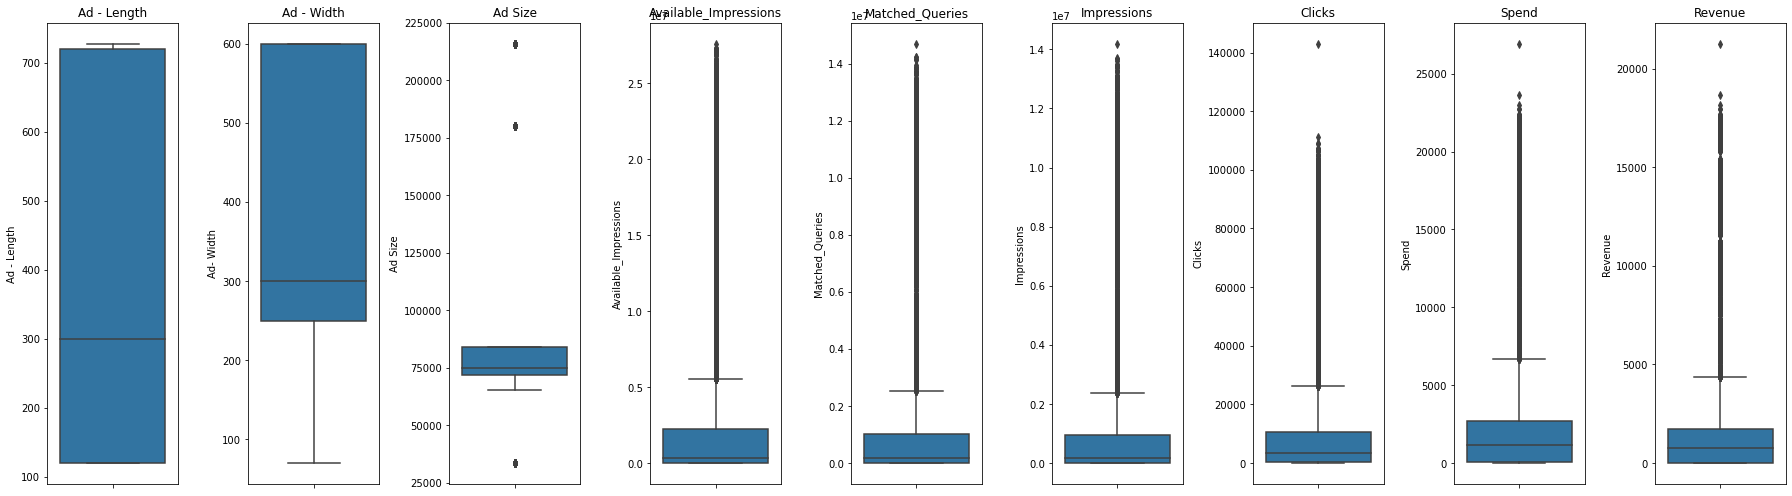

In [18]:
fig, axes = plt.subplots(1,9,figsize=(25,7))
sns.boxplot(ax=axes[0], data=df_cluster, y='Ad - Length').set_title("Ad - Length")
sns.boxplot(ax=axes[1], data=df_cluster, y='Ad- Width').set_title("Ad - Width")
sns.boxplot(ax=axes[2], data=df_cluster, y='Ad Size').set_title("Ad Size")
sns.boxplot(ax=axes[3], data=df_cluster, y='Available_Impressions').set_title("Available_Impressions")
sns.boxplot(ax=axes[4], data=df_cluster, y='Matched_Queries').set_title("Matched_Queries")
sns.boxplot(ax=axes[5], data=df_cluster, y='Impressions').set_title("Impressions")
sns.boxplot(ax=axes[6], data=df_cluster, y='Clicks').set_title("Clicks")
sns.boxplot(ax=axes[7], data=df_cluster, y='Spend').set_title("Spend")
sns.boxplot(ax=axes[8], data=df_cluster, y='Revenue').set_title("Revenue")
plt.tight_layout();

In [19]:
#Function to treat outliers:
def detect_outlier(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-1.5*IQR
    upper_range = Q3+1.5*IQR
    return lower_range, upper_range

In [20]:
features_list = df_cluster.columns
for i in features_list:
    LL,UL = detect_outlier(df_cluster[i])
    df_cluster[i] = np.where(df_cluster[i]>UL,UL,df_cluster[i])
    df_cluster[i] = np.where(df_cluster[i]<LL,LL,df_cluster[i])
    print("Lower Range : ",LL," & upper Range : ",UL)

Lower Range :  -780.0  & upper Range :  1620.0
Lower Range :  -275.0  & upper Range :  1125.0
Lower Range :  54000.0  & upper Range :  102000.0
Lower Range :  -3289893.5  & upper Range :  5507510.5
Lower Range :  -1498629.0  & upper Range :  2512251.0
Lower Range :  -1418144.5  & upper Range :  2370395.5
Lower Range :  -15259.0  & upper Range :  26245.0
Lower Range :  -3948.345  & upper Range :  6676.655000000001
Lower Range :  -2566.4230000000002  & upper Range :  4339.825000000001


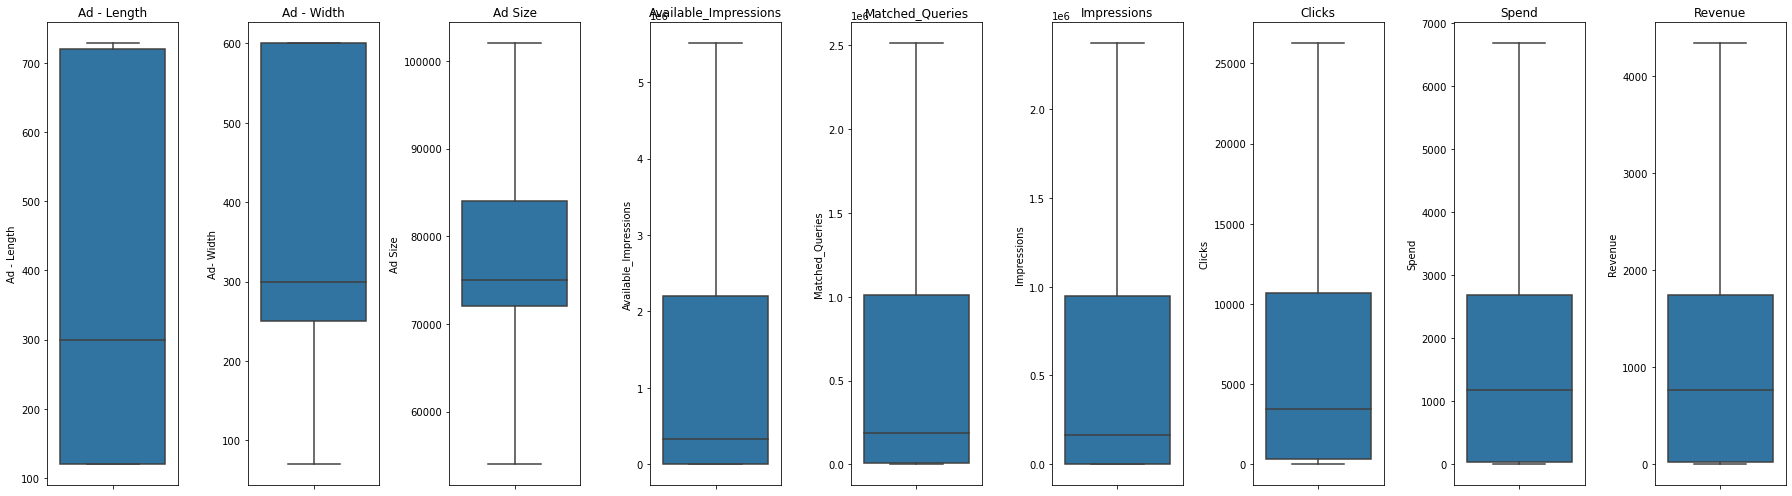

In [21]:
fig, axes = plt.subplots(1,9,figsize=(25,7))
sns.boxplot(ax=axes[0], data=df_cluster, y='Ad - Length').set_title("Ad - Length")
sns.boxplot(ax=axes[1], data=df_cluster, y='Ad- Width').set_title("Ad - Width")
sns.boxplot(ax=axes[2], data=df_cluster, y='Ad Size').set_title("Ad Size")
sns.boxplot(ax=axes[3], data=df_cluster, y='Available_Impressions').set_title("Available_Impressions")
sns.boxplot(ax=axes[4], data=df_cluster, y='Matched_Queries').set_title("Matched_Queries")
sns.boxplot(ax=axes[5], data=df_cluster, y='Impressions').set_title("Impressions")
sns.boxplot(ax=axes[6], data=df_cluster, y='Clicks').set_title("Clicks")
sns.boxplot(ax=axes[7], data=df_cluster, y='Spend').set_title("Spend")
sns.boxplot(ax=axes[8], data=df_cluster, y='Revenue').set_title("Revenue")
plt.tight_layout();

•Yes, we need to treat Outliers as K-means Clustering is sensitive to outliers.

#### #Part 1 - Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [22]:
#Scaling the data using the ZScore Scaling function
df_cluster_scaled =  df_cluster.apply(zscore)
df_cluster_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Revenue
0,-0.392000,-0.423062,-0.161806,-0.714953,-0.744816,-0.735050,-0.821889,-0.844382,-0.841307
1,-0.392000,-0.423062,-0.161806,-0.714862,-0.744749,-0.734983,-0.822006,-0.844382,-0.841307
2,-0.235948,-0.423062,0.424415,-0.715079,-0.744846,-0.735081,-0.822006,-0.844382,-0.841307
3,-0.392000,-0.423062,-0.161806,-0.715566,-0.745066,-0.735313,-0.822006,-0.844382,-0.841307
4,-0.392000,-0.423062,-0.161806,-0.715088,-0.744791,-0.735024,-0.822006,-0.844382,-0.841307


•Without Scaling data, the algorithm may be biased towards higher value.

#### #Perform clustering and do the following:
#### #Part 1 - Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

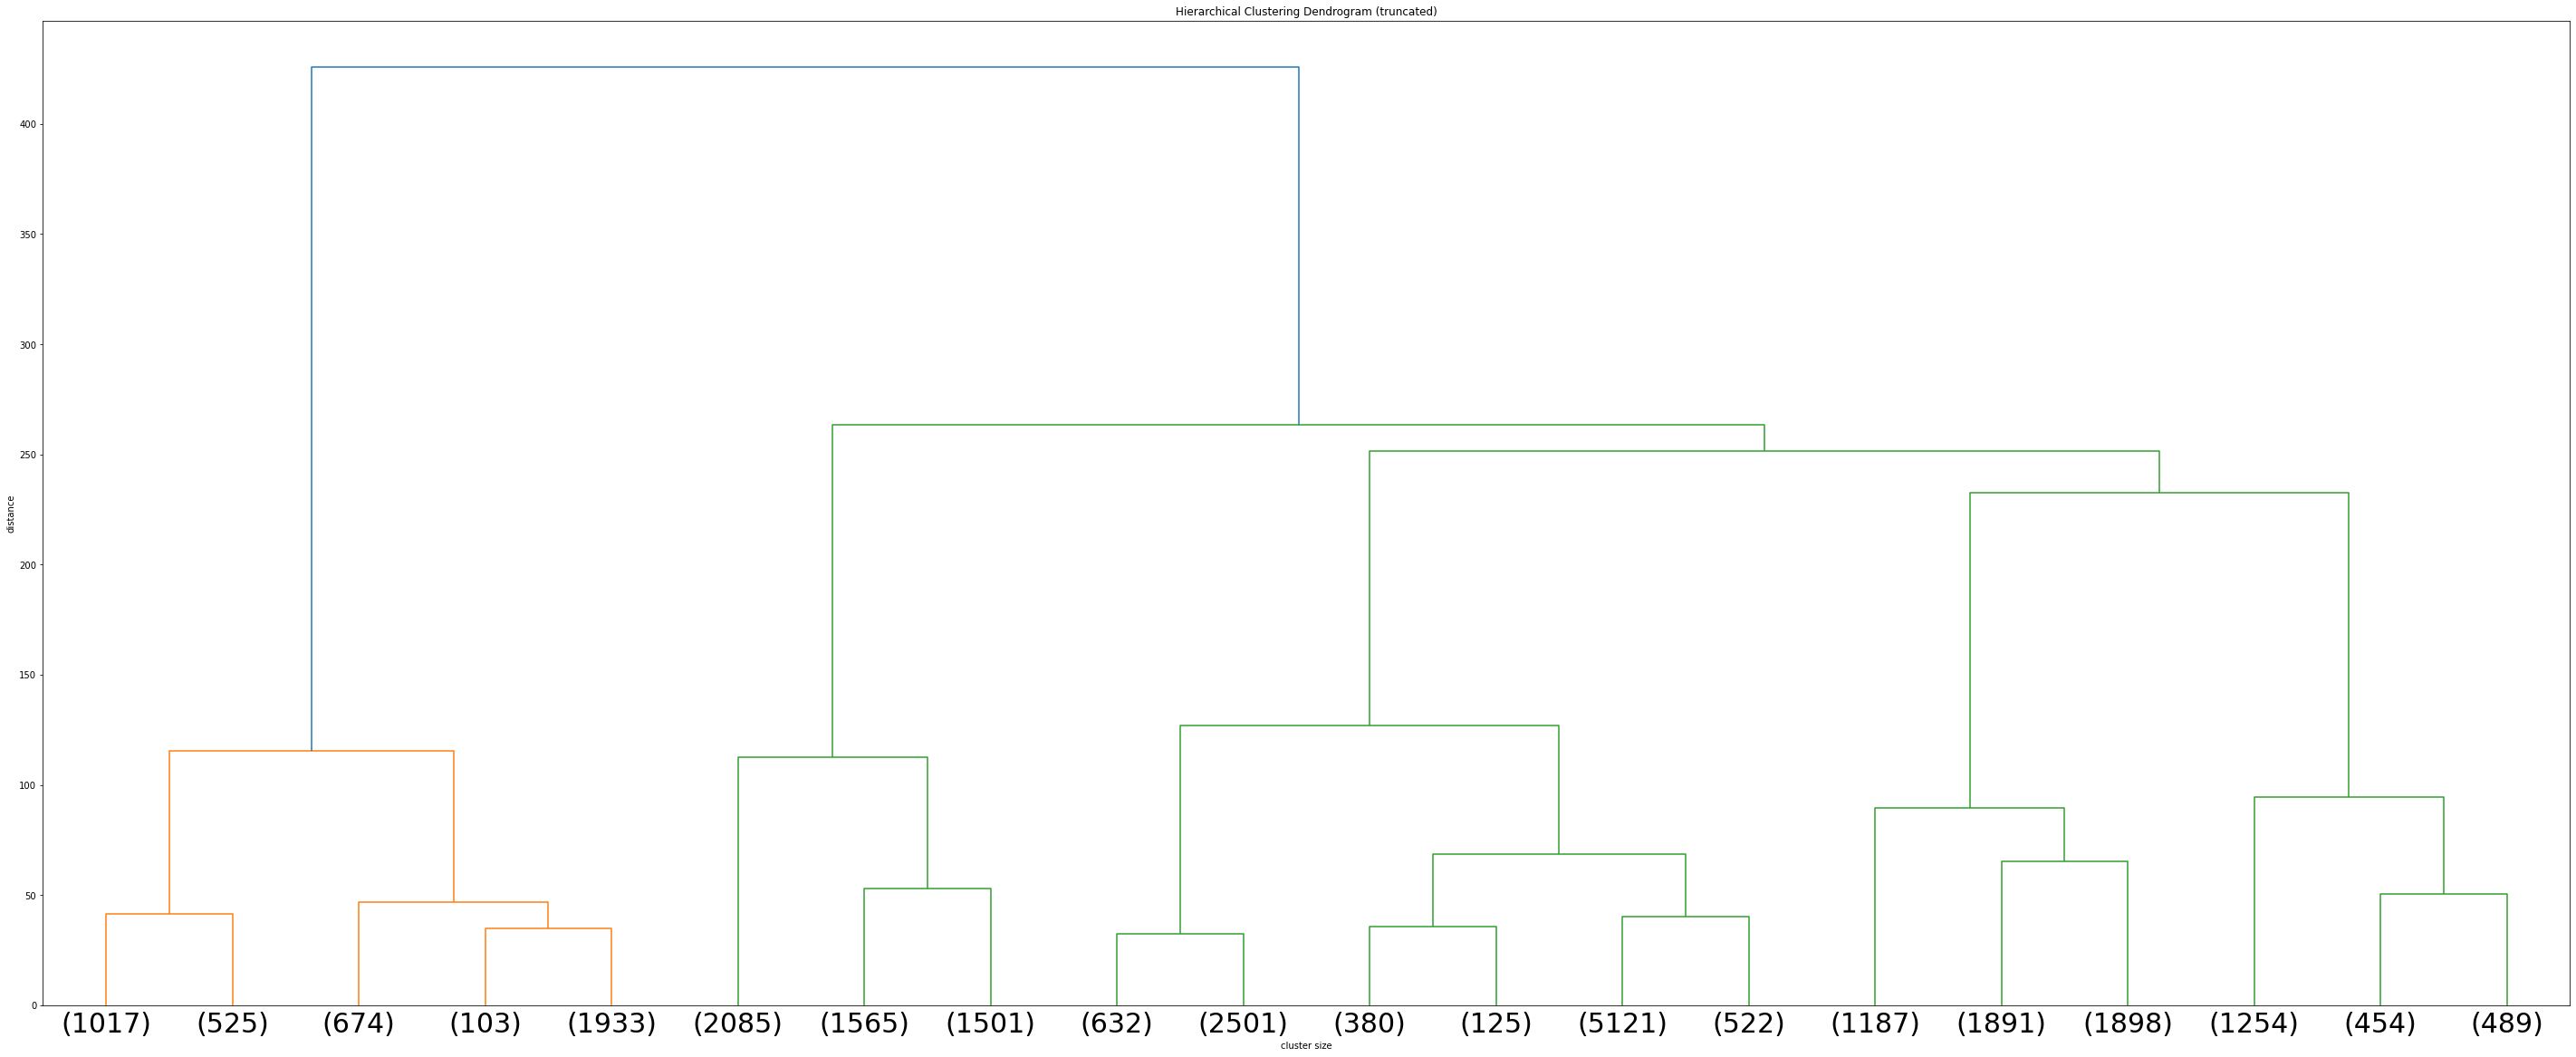

In [23]:
plt.figure(figsize=(50, 20))
wardlink = linkage(df_cluster_scaled, method ='ward', metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('cluster size')
plt.ylabel('distance')
dendrogram(
    wardlink,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    leaf_font_size=30
);

#### #Part 1 - Clustering: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

In [24]:
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 123)
    kmeans.fit(df_cluster_scaled)
    # inertia method returns wcss for that model
    wss.append(kmeans.inertia_)

In [25]:
for i in range(1,11):
    print('The WSS value for',i,'clusters is',wss[i-1])

The WSS value for 1 clusters is 232713.00000000006
The WSS value for 2 clusters is 135274.92683140206
The WSS value for 3 clusters is 100590.2395311129
The WSS value for 4 clusters is 71656.59481682391
The WSS value for 5 clusters is 45771.31324276951
The WSS value for 6 clusters is 37438.815811017026
The WSS value for 7 clusters is 30149.7112338386
The WSS value for 8 clusters is 23382.874391416677
The WSS value for 9 clusters is 18790.9933324645
The WSS value for 10 clusters is 16544.499210561502


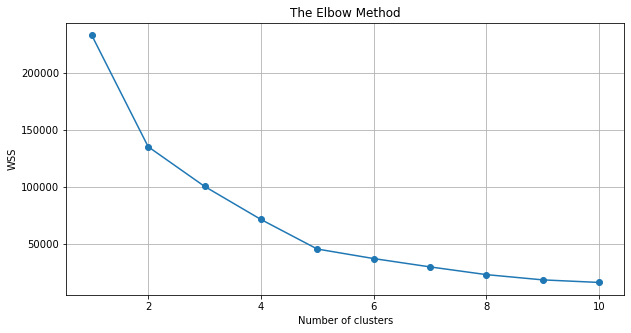

In [26]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.grid()

#So from the Dendogram we can say optimum number of clusters : ' 5 '

#### #Part 1 - Clustering: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [27]:
silhouette_scores=[]
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 123)
    kmeans.fit(df_cluster_scaled)
    labels = kmeans.labels_
    s_score=silhouette_score(df_cluster_scaled,labels)
    # inertia method returns wss for that model
    silhouette_scores.append(s_score)

In [28]:
for i in range(2,11):
    print('The Silhouette scores for',i,'clusters is',silhouette_scores[i-2])

The Silhouette scores for 2 clusters is 0.43093038125940913
The Silhouette scores for 3 clusters is 0.4169029019588384
The Silhouette scores for 4 clusters is 0.4859045662423113
The Silhouette scores for 5 clusters is 0.5484421685630947
The Silhouette scores for 6 clusters is 0.5554079926857388
The Silhouette scores for 7 clusters is 0.5882973964429631
The Silhouette scores for 8 clusters is 0.6005106775133303
The Silhouette scores for 9 clusters is 0.6298955511943023
The Silhouette scores for 10 clusters is 0.6296839903311501


#So from the Silhouette scores we can say optimum number of clusters : ' 5 '

#### #Part 1 - Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots.]

In [29]:
k_means = KMeans(n_clusters = 5,random_state=123)
k_means.fit(df_cluster_scaled)
labels = k_means.labels_
labels

array([1, 1, 1, ..., 3, 1, 3])

In [30]:
sil_width = silhouette_samples(df_cluster_scaled,labels)

In [31]:
df_cluster['k_means_cluster_5']= labels
df_cluster['sil_width']= sil_width
df_cluster.head(10)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Revenue,k_means_cluster_5,sil_width
0,300.0,250.0,75000.0,1806.0,325.0,323.0,1.0,0.0,0.0,1,0.448342
1,300.0,250.0,75000.0,1979.0,384.0,380.0,0.0,0.0,0.0,1,0.448323
2,336.0,250.0,84000.0,1566.0,298.0,297.0,0.0,0.0,0.0,1,0.377036
3,300.0,250.0,75000.0,643.0,103.0,102.0,0.0,0.0,0.0,1,0.448406
4,300.0,250.0,75000.0,1550.0,347.0,345.0,0.0,0.0,0.0,1,0.448351
5,300.0,250.0,75000.0,2641.0,493.0,491.0,0.0,0.0,0.0,1,0.448258
6,300.0,250.0,75000.0,469.0,104.0,103.0,0.0,0.0,0.0,1,0.448407
7,300.0,250.0,75000.0,1244.0,154.0,153.0,0.0,0.0,0.0,1,0.448390
8,300.0,250.0,75000.0,1961.0,287.0,287.0,0.0,0.0,0.0,1,0.448342
9,300.0,250.0,75000.0,1670.0,223.0,223.0,0.0,0.0,0.0,1,0.448367


In [32]:
df_kclust_5 = df_cluster.groupby('k_means_cluster_5').mean()
cluster_5_freq = df_cluster['k_means_cluster_5'].value_counts().sort_index()
df_kclust_5['cluster count'] = cluster_5_freq
df_kclust_5

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Revenue,sil_width,cluster count
k_means_cluster_5,,,,,,,,,,,
0,460.364417,201.664679,73127.421894,5.161947e+06,2.450391e+06,2.324038e+06,11031.213212,5291.014889,3522.500695,0.532136,4193
1,190.589008,486.999124,75315.305452,7.423864e+04,3.971523e+04,3.467679e+04,1208.494964,166.682201,108.343391,0.592978,9134
2,442.612982,122.553151,61203.386642,1.939653e+06,9.174353e+05,8.754002e+05,3559.829163,1600.696988,1042.279585,0.458668,5315
3,693.438349,303.413000,101136.338946,2.174275e+05,1.177387e+05,1.002682e+05,11424.665037,1045.018470,680.529256,0.532449,5523
4,142.957447,572.281324,73925.531915,7.561640e+05,5.324346e+05,4.491000e+05,25720.598109,5734.283874,3785.384493,0.682636,1692


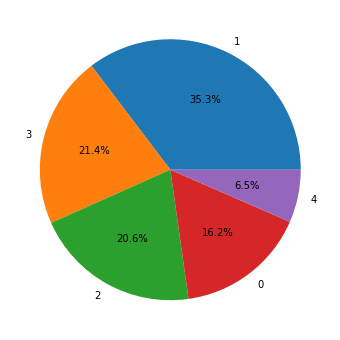

In [33]:
#Cluster Profiling :
plt.figure(figsize=(6,6))
plt.pie(df_cluster['k_means_cluster_5'].value_counts(),labels=df_cluster['k_means_cluster_5'].value_counts().index,autopct='%1.1f%%')
plt.show()

#### #Part 1 - Clustering: Conclude the project by providing summary of your learnings.

•The dataset has 25857 rows and 19 columns.

•The missing values in CPC, CTR and CPM are treated by using the formulae given and writing a user-defined function, and calling it.

•We check for outliers, we can see there are outliers in the variables. 

•Dendogram is the visualization and linkage is for computing the distances and merging  the clusters from n to 1.

•The output of Linkage is visualized by Dendogram.

•We will create linkage using Ward’s method and run linkage function on the usable columns of the data.

•The linkage now stores the various distance at which the n clusters are sequentially merged into a single cluster.

•using fit – transform function and viewing the output - The dataframe is now stored in an array.

•Using this array we can now perform k-means

•The one requirement before we run the k-means algorithm, is to know how many clusters we require as output

•We map the elbow plot using wss values 

•From the plot we have following observations:

•When we move from k=1 to k=2 , we see that there is a significant drop in the value , also when we move from k=2 to k=3,k=3 to k=4 there is a significant drop aswell.

•But from k=4 to k=5 , k=5 to k=6 , the drop in values reduces significantly. 

•In otherwords, the wss is not significantly dropping beyond 5,

•So 5 is optimal number of clusters.



### #PCA:

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.

The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

In [34]:
#Importing Excel File to Notebook
df_pca = pd.read_excel('PCA_India_Data_Census.xlsx')

#### #PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [35]:
#Bottom 5 rows :
pd.set_option('display.max_rows', 70)
df_pca.head(5).T

,0,1,2,3,4
State Code,1,1,1,1,1
Dist.Code,1,2,3,4,5
State,Jammu & Kashmir,Jammu & Kashmir,Jammu & Kashmir,Jammu & Kashmir,Jammu & Kashmir
Area Name,Kupwara,Badgam,Leh(Ladakh),Kargil,Punch
No_HH,7707,6218,4452,1320,11654
TOT_M,23388,19585,6546,2784,20591
TOT_F,29796,23102,10964,4206,29981
M_06,5862,4482,1082,563,5157
F_06,6196,3733,1018,677,4587
M_SC,3,7,3,0,20


In [36]:
#Bottom 5 rows :
pd.set_option('display.max_rows', 70)
df_pca.tail(5).T

,635,636,637,638,639
State Code,34,34,35,35,35
Dist.Code,636,637,638,639,640
State,Puducherry,Puducherry,Andaman & Nicobar Island,Andaman & Nicobar Island,Andaman & Nicobar Island
Area Name,Mahe,Karaikal,Nicobars,North & Middle Andaman,South Andaman
No_HH,3333,10612,1275,3762,7975
TOT_M,8154,12346,1549,5200,11977
TOT_F,11781,21691,2630,8012,18049
M_06,1146,1544,227,723,1470
F_06,1203,1533,225,664,1358
M_SC,21,2234,0,0,0


In [37]:
#Data-frame info 
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [38]:
#Data-frame Summary 
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [39]:
#Total rows & Columns in dataframe :
df_pca.shape

(640, 61)

In [40]:
#Null value check :
pd.set_option('display.max_rows', 500)
df_pca.isnull().sum()

State Code        0
Dist.Code         0
State             0
Area Name         0
No_HH             0
TOT_M             0
TOT_F             0
M_06              0
F_06              0
M_SC              0
F_SC              0
M_ST              0
F_ST              0
M_LIT             0
F_LIT             0
M_ILL             0
F_ILL             0
TOT_WORK_M        0
TOT_WORK_F        0
MAINWORK_M        0
MAINWORK_F        0
MAIN_CL_M         0
MAIN_CL_F         0
MAIN_AL_M         0
MAIN_AL_F         0
MAIN_HH_M         0
MAIN_HH_F         0
MAIN_OT_M         0
MAIN_OT_F         0
MARGWORK_M        0
MARGWORK_F        0
MARG_CL_M         0
MARG_CL_F         0
MARG_AL_M         0
MARG_AL_F         0
MARG_HH_M         0
MARG_HH_F         0
MARG_OT_M         0
MARG_OT_F         0
MARGWORK_3_6_M    0
MARGWORK_3_6_F    0
MARG_CL_3_6_M     0
MARG_CL_3_6_F     0
MARG_AL_3_6_M     0
MARG_AL_3_6_F     0
MARG_HH_3_6_M     0
MARG_HH_3_6_F     0
MARG_OT_3_6_M     0
MARG_OT_3_6_F     0
MARGWORK_0_3_M    0


In [41]:
#Duplicate value Check :
print('Total duplicate values :',df_pca.duplicated().sum())

Total duplicate values : 0


#### #Part 2 - PCA: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

#Choose these 5 variables for EDA : 'No_HH', 'TOT_M', 'TOT_F', 'TOT_WORK_M', 'TOT_WORK_F'.

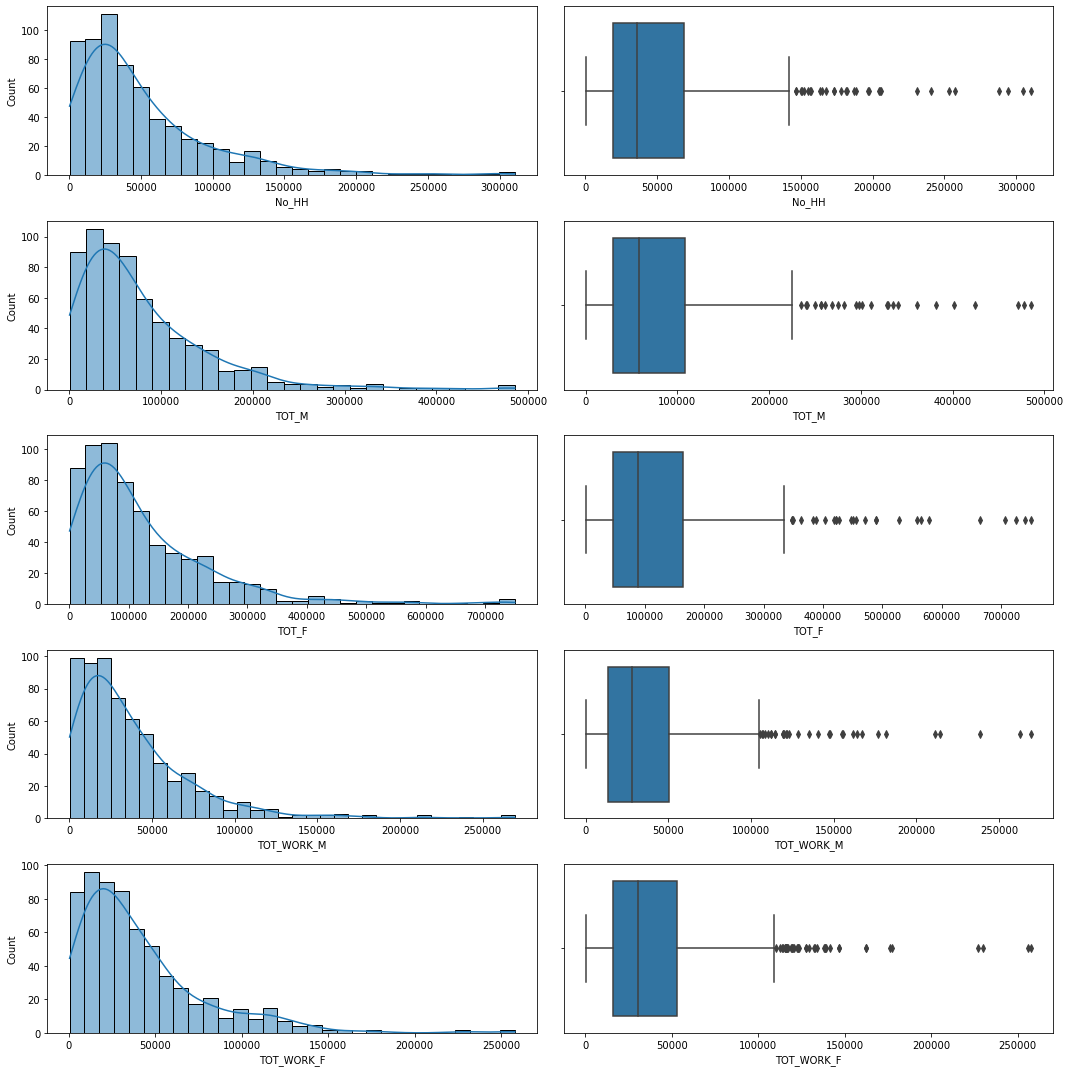

In [42]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15,15)

sns.histplot(df_pca['No_HH'], kde=True, ax=axes[0][0])
sns.boxplot(x='No_HH', data=df_pca, ax=axes[0][1])

sns.histplot(df_pca['TOT_M'] , kde=True, ax=axes[1][0])
sns.boxplot(x='TOT_M', data=df_pca , ax=axes[1][1])

sns.histplot(df_pca['TOT_F'] , kde=True, ax=axes[2][0])
sns.boxplot(x='TOT_F', data=df_pca , ax=axes[2][1])

sns.histplot(df_pca['TOT_WORK_M'] , kde=True, ax=axes[3][0])
sns.boxplot(x='TOT_WORK_M', data=df_pca , ax=axes[3][1])

sns.histplot(df_pca['TOT_WORK_F'] , kde=True, ax=axes[4][0])
sns.boxplot(x='TOT_WORK_F', data=df_pca , ax=axes[4][1])
plt.tight_layout()
plt.show()

#From the Univariate Analysis we can say all variables are Left Skewed here and all are having Outliers.

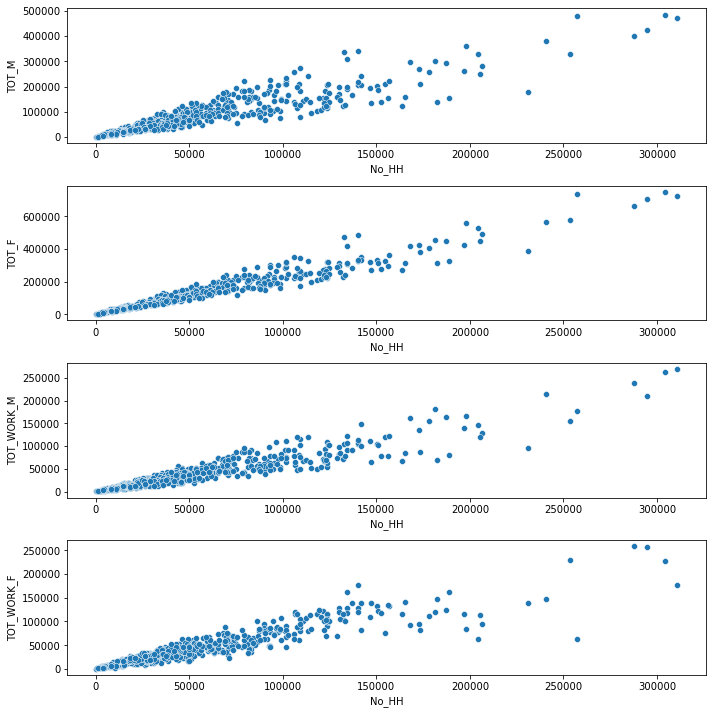

In [43]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10,10)

sns.scatterplot(data=df_pca, x="No_HH", y="TOT_M",ax=axes[0])
sns.scatterplot(data=df_pca, x="No_HH", y="TOT_F",ax=axes[1])
sns.scatterplot(data=df_pca, x="No_HH", y="TOT_WORK_M",ax=axes[2])
sns.scatterplot(data=df_pca, x="No_HH", y="TOT_WORK_F",ax=axes[3])

plt.tight_layout()
plt.show();

#From the Bivariate Analysis we can say all variables are Positively Co-related to each other.

##### #We need to drop Some columns which are non-contineous in nature :

In [44]:
df_pca.drop(['State Code', 'Dist.Code', 'State', 'Area Name'], axis=1, inplace=True)

In [45]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   No_HH           640 non-null    int64
 1   TOT_M           640 non-null    int64
 2   TOT_F           640 non-null    int64
 3   M_06            640 non-null    int64
 4   F_06            640 non-null    int64
 5   M_SC            640 non-null    int64
 6   F_SC            640 non-null    int64
 7   M_ST            640 non-null    int64
 8   F_ST            640 non-null    int64
 9   M_LIT           640 non-null    int64
 10  F_LIT           640 non-null    int64
 11  M_ILL           640 non-null    int64
 12  F_ILL           640 non-null    int64
 13  TOT_WORK_M      640 non-null    int64
 14  TOT_WORK_F      640 non-null    int64
 15  MAINWORK_M      640 non-null    int64
 16  MAINWORK_F      640 non-null    int64
 17  MAIN_CL_M       640 non-null    int64
 18  MAIN_CL_F       640 non-null  

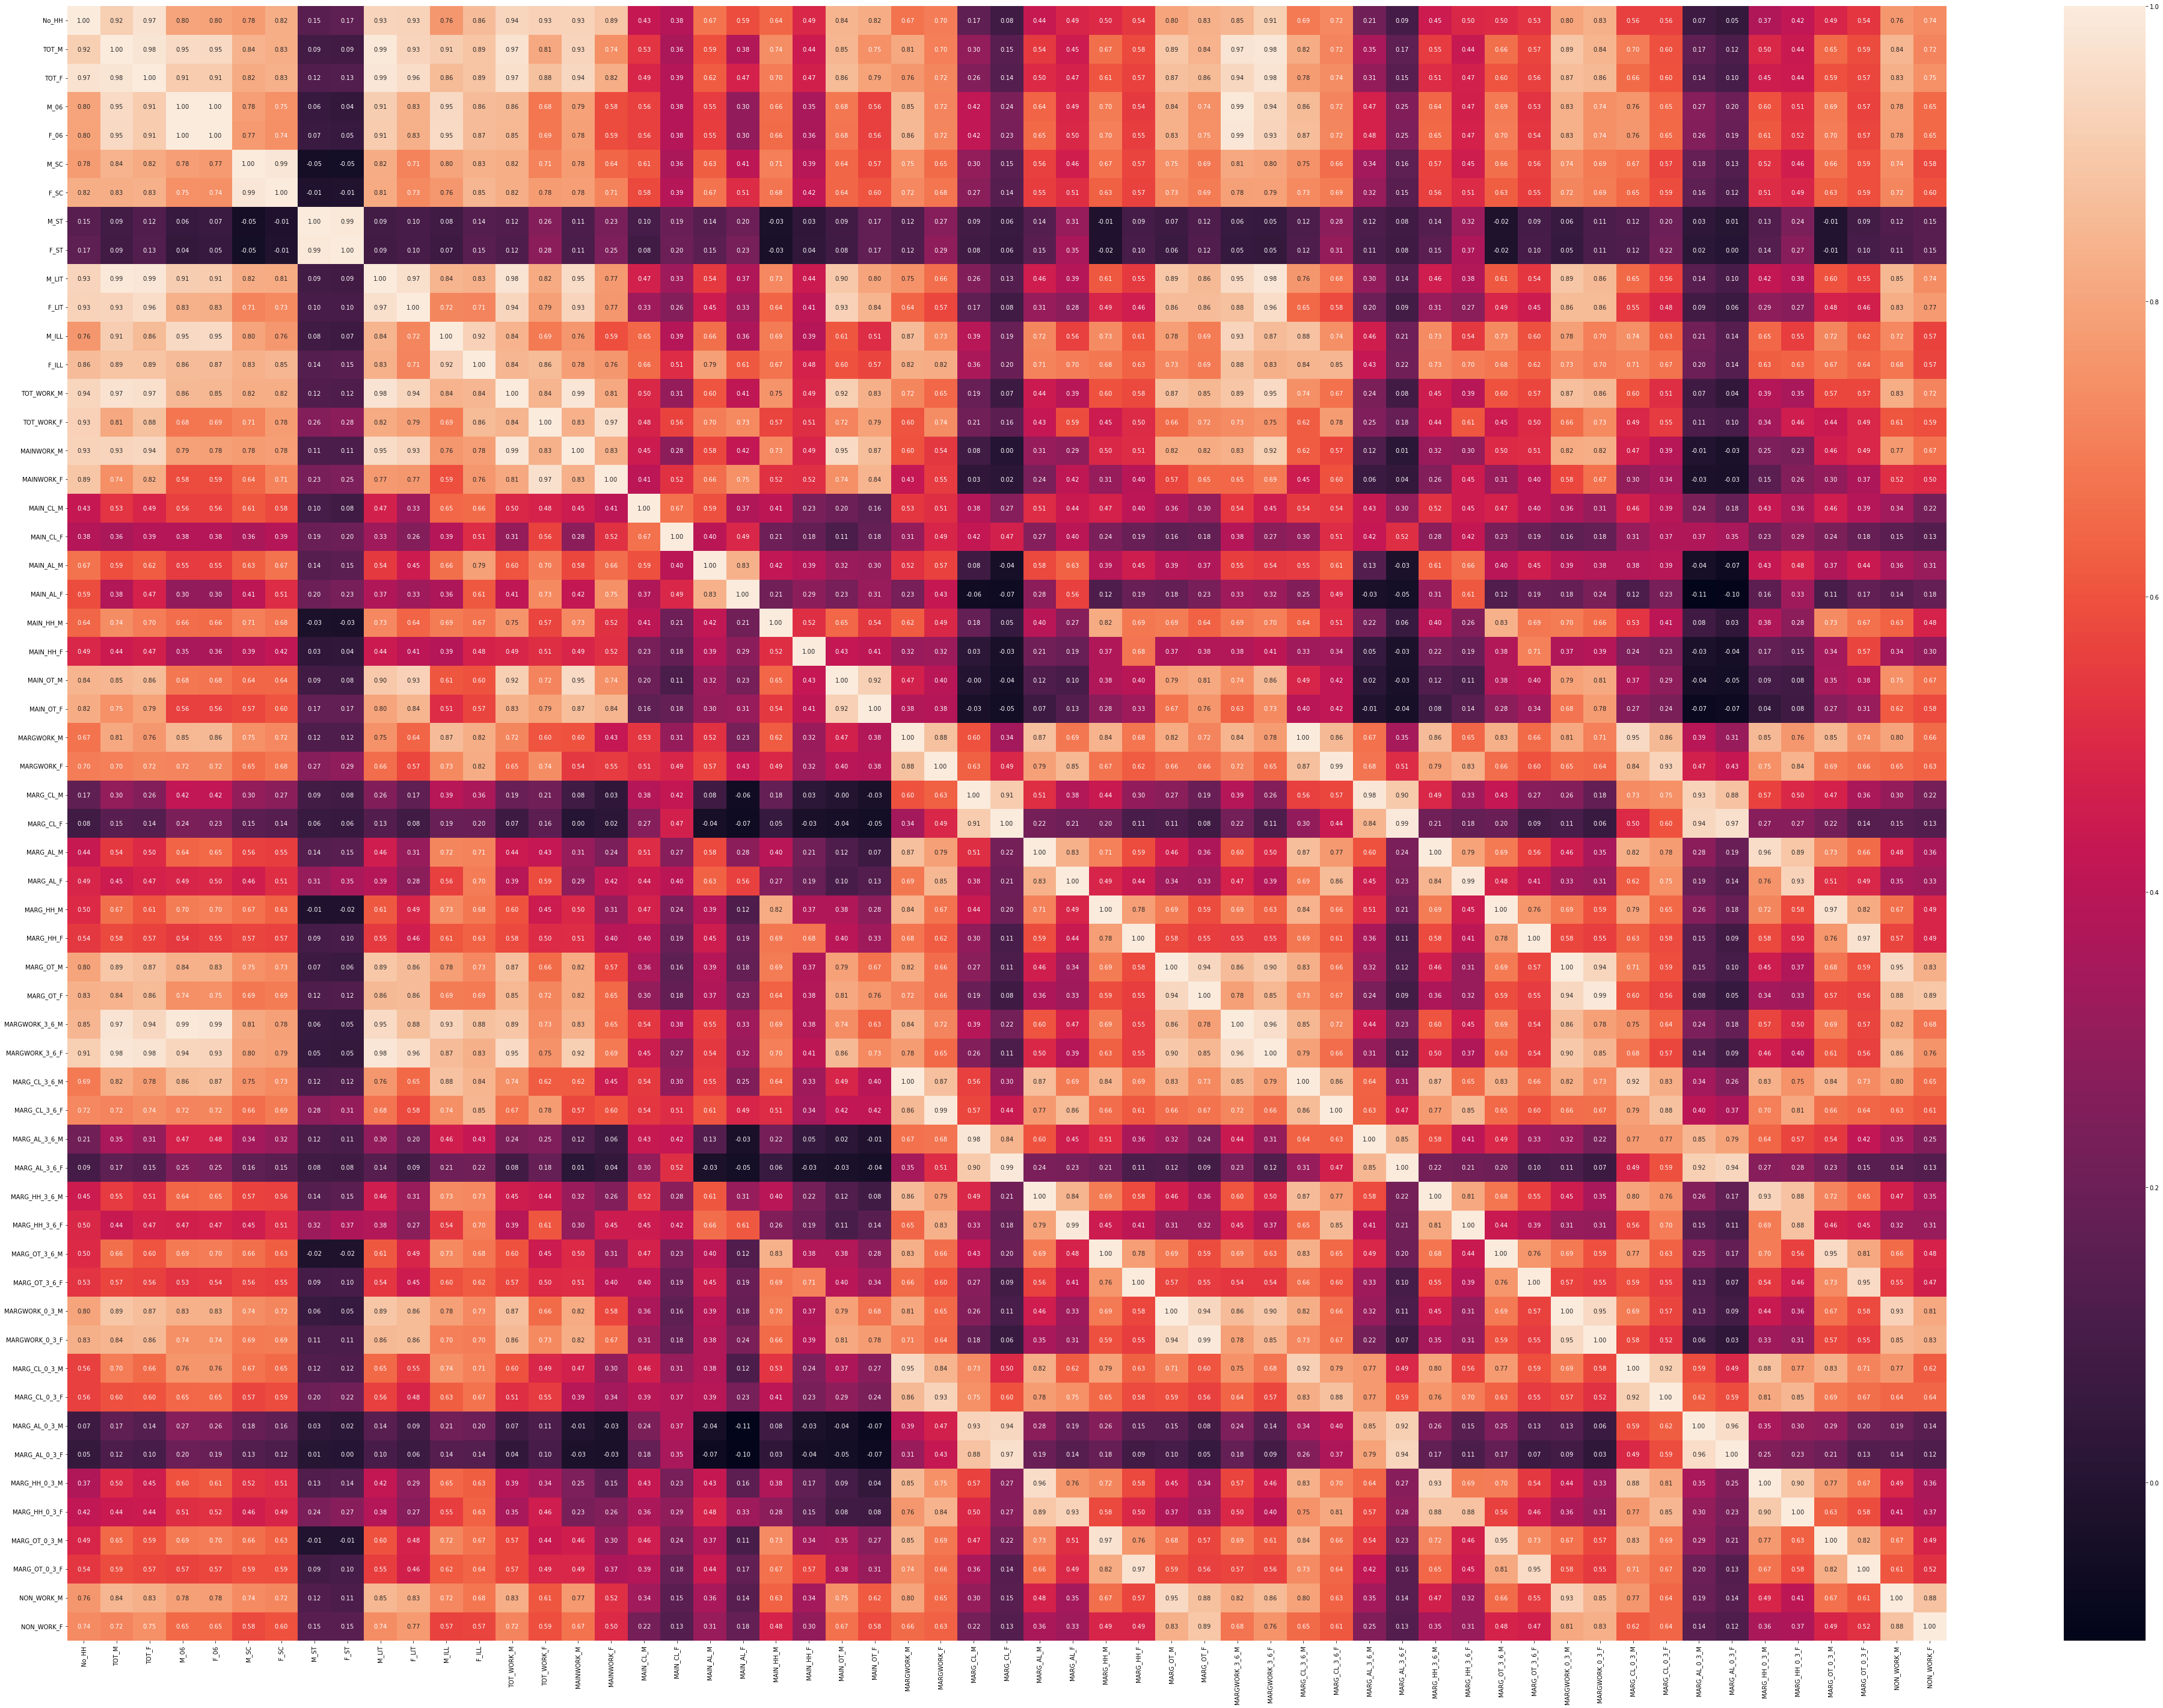

In [46]:
#Check for presence of correlations
plt.figure(figsize = (70,50))
sns.heatmap(df_pca.corr(), annot=True,fmt='.2f');

#### #Part 2 - PCA: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

Ans. : Outliers treatment is not necessary unless the they are the result from a processing mistake or wrong measurement. True outliers must be kept in the data.

#### #Part 2 - PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

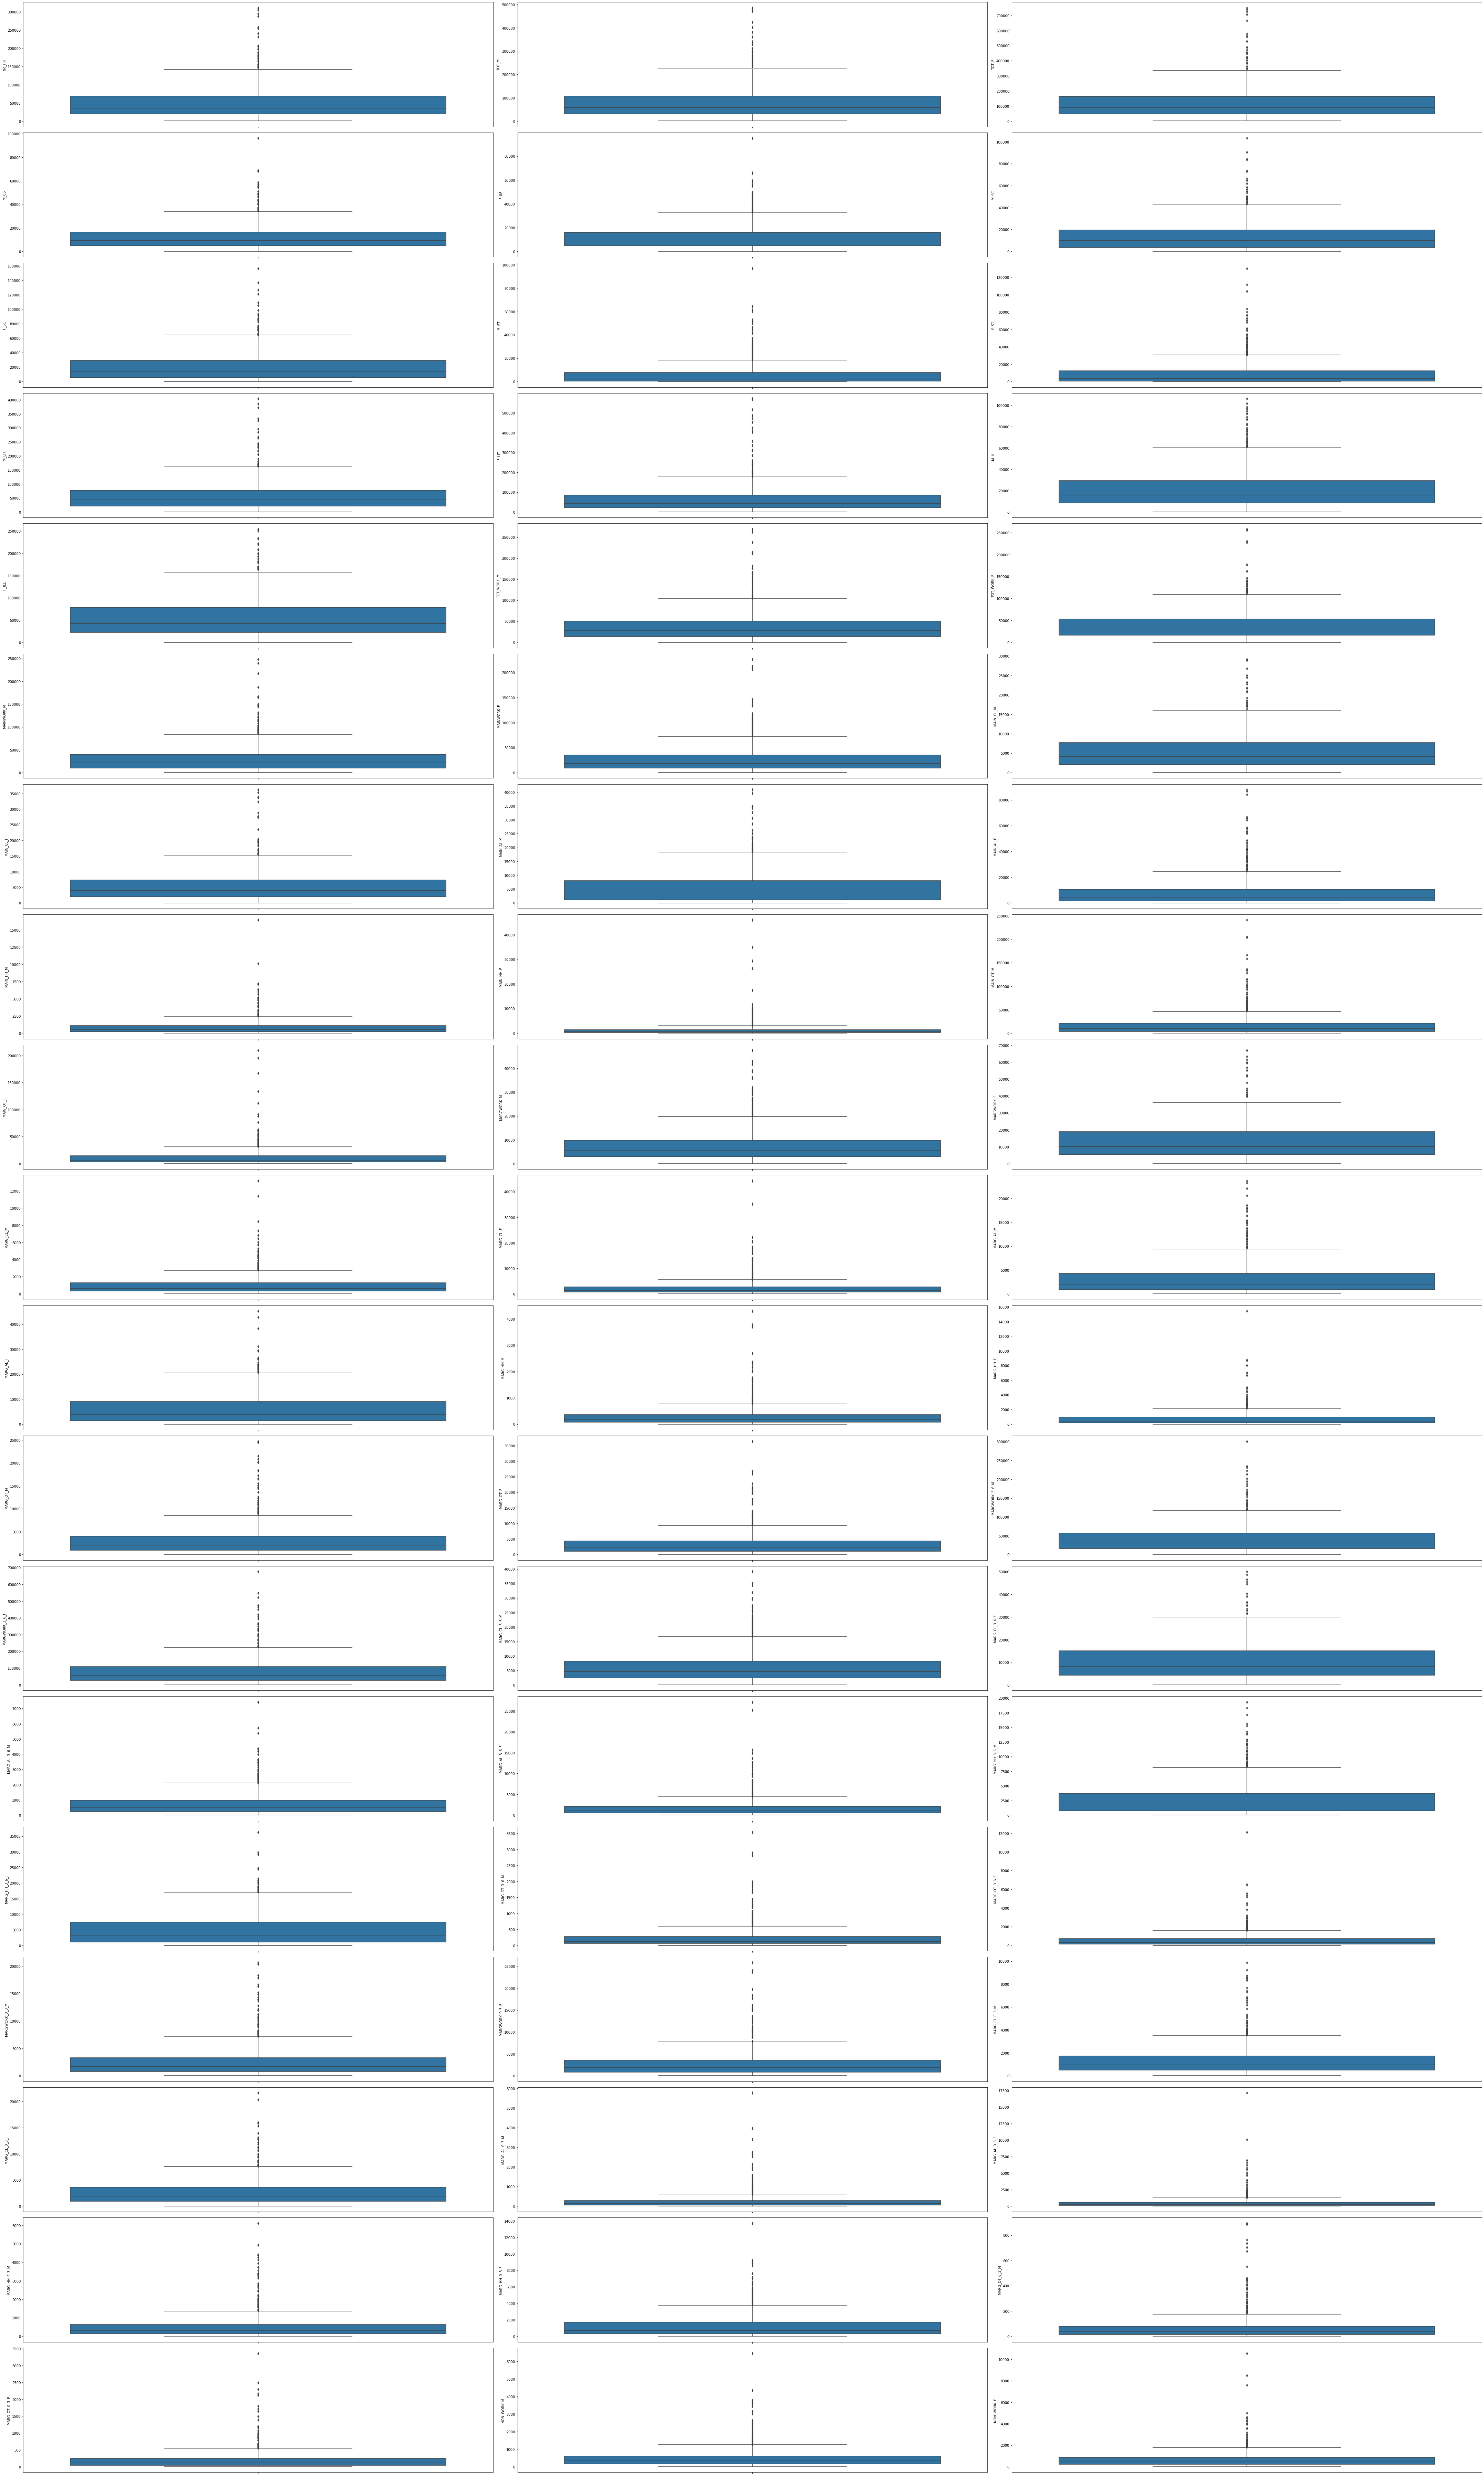

In [47]:
# Presence of outliers before z-score method :
plt.figure(figsize=(60,100))
features_list = df_pca.columns
for i in range(len(features_list)):
    plt.subplot(19,3,i+1)
    sns.boxplot(y=df_pca[features_list[i]],data=df_pca)
    plt.tight_layout()

In [48]:
#Applying Z-score:
df_pca_scaled =  df_pca.apply(zscore)
df_pca_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


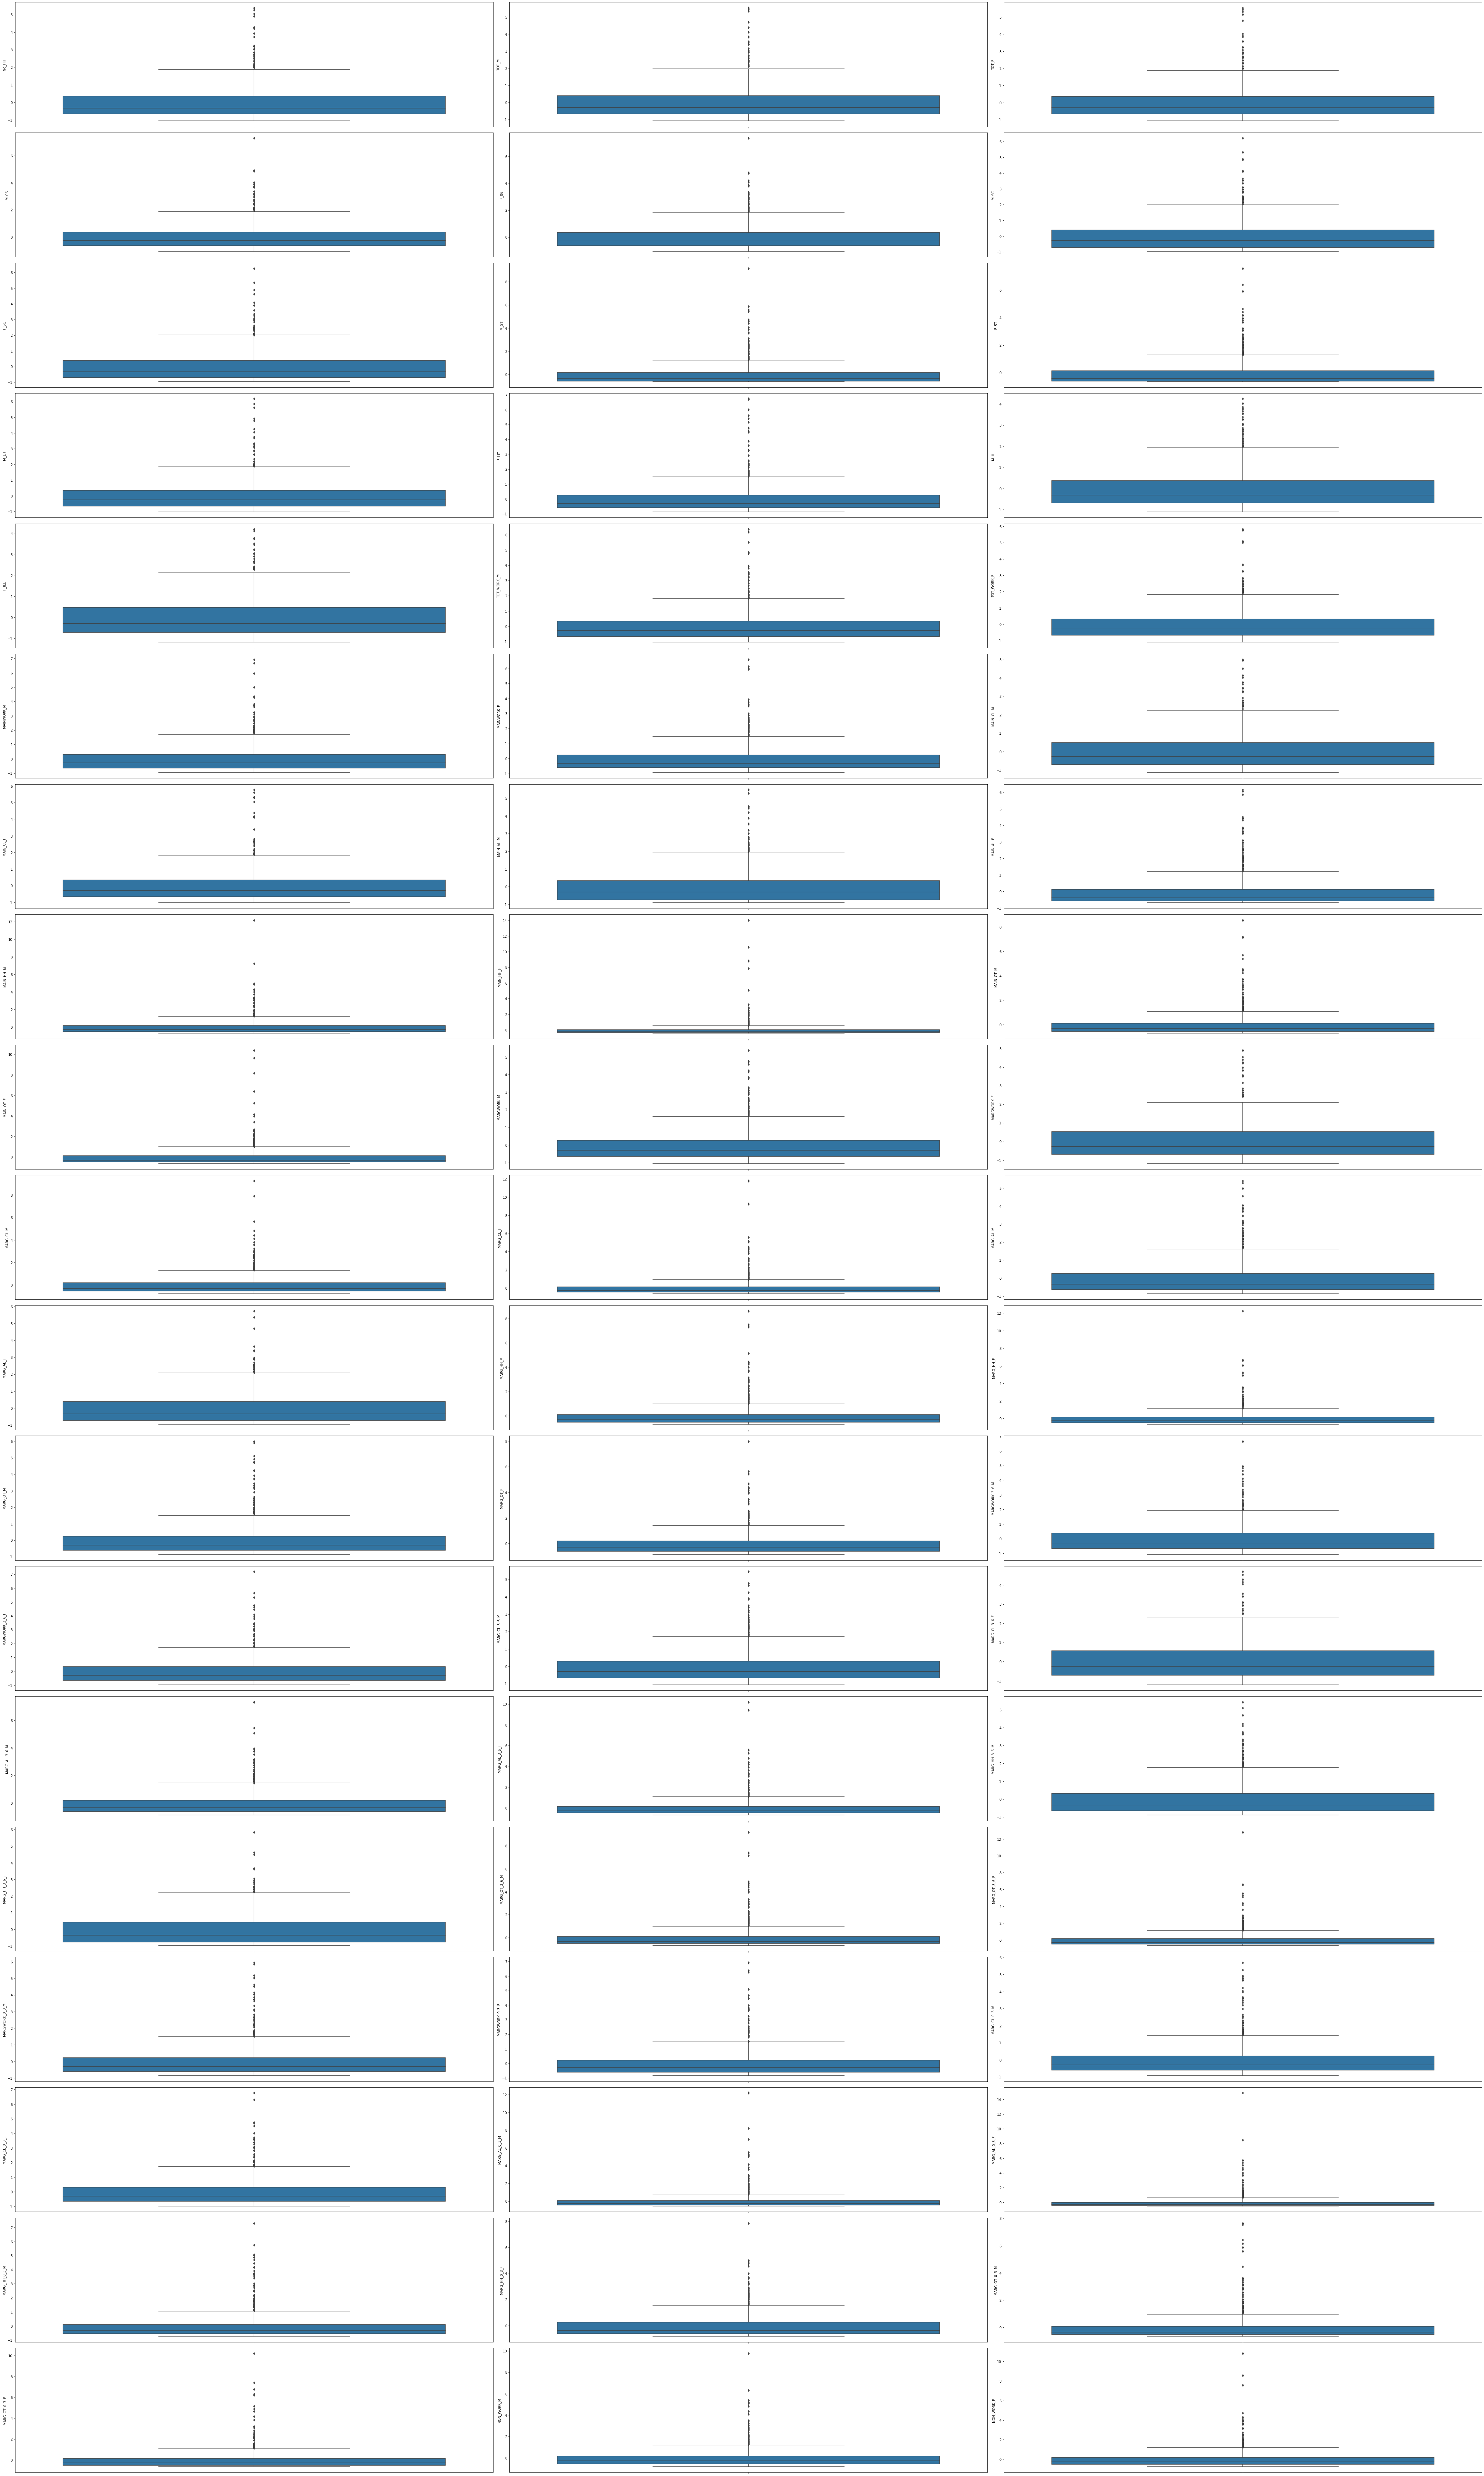

In [49]:
# Presence of outliers after z-score method :
plt.figure(figsize=(60,100))
features_list_scaled = df_pca_scaled.columns
for i in range(len(features_list)):
    plt.subplot(19,3,i+1)
    sns.boxplot(y=df_pca_scaled[features_list[i]],data=df_pca_scaled)
    plt.tight_layout()

#So we can clearly see that scaling have no impact on outliers

#### #Part 2 - PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

In [50]:
cov_matrix = np.cov(df_pca_scaled.T)
cov_matrix

array([[1.00156495, 0.91760364, 0.97210871, ..., 0.53769433, 0.76357722,
        0.73684378],
       [0.91760364, 1.00156495, 0.98417823, ..., 0.5891007 , 0.84621844,
        0.71718181],
       [0.97210871, 0.98417823, 1.00156495, ..., 0.572748  , 0.82894851,
        0.74775097],
       ...,
       [0.53769433, 0.5891007 , 0.572748  , ..., 1.00156495, 0.61052325,
        0.52191235],
       [0.76357722, 0.84621844, 0.82894851, ..., 0.61052325, 1.00156495,
        0.88228018],
       [0.73684378, 0.71718181, 0.74775097, ..., 0.52191235, 0.88228018,
        1.00156495]])

In [51]:
#Apply PCA taking all features
pca = PCA(n_components=57, random_state=123)
pca.fit_transform(df_pca_scaled)

array([[-4.61726348e+00,  1.38115857e-01,  3.28544953e-01, ...,
         2.73292026e-16, -1.42377905e-16, -1.90746847e-16],
       [-4.77166187e+00, -1.05865351e-01,  2.44448976e-01, ...,
         1.18252021e-15,  8.20488877e-16, -1.12341181e-15],
       [-5.96483558e+00, -2.94346892e-01,  3.67393453e-01, ...,
        -9.29302018e-16, -3.06504742e-16,  6.98933512e-16],
       ...,
       [-6.29462500e+00, -6.38126644e-01,  1.07482817e-01, ...,
        -1.06167705e-15, -1.31275067e-15, -7.44477138e-17],
       [-6.22319199e+00, -6.72319673e-01,  2.71325467e-01, ...,
        -7.43489803e-16,  4.15609061e-16,  1.24138572e-16],
       [-5.89623627e+00, -9.37169526e-01,  3.49218364e-01, ...,
         2.16298620e-16,  7.16665148e-16,  8.49790990e-17]])

In [52]:
#Extract eigen vectors
pca.components_

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [ 0.        ,  0.14884588,  0.21643081, ...,  0.01740567,
        -0.0135858 ,  0.00152872],
       [ 0.        ,  0.11336536, -0.01111799, ..., -0.02196029,
        -0.08140651, -0.01767078],
       [ 0.        , -0.24963875,  0.38221285, ...,  0.02957246,
         0.04681613,  0.10209731]])

In [53]:
#Check the eigen values
pca.explained_variance_

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 1.39427796e-30,
       4.37180870e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

In [54]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 2.44227965e-32,
       7.65785570e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
      

#### #Part 2 - PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

In [55]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_pca_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12', 
                                                'PC13','PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19','PC20', 'PC21', 'PC22', 'PC23',
                                               'PC24','PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30','PC31', 'PC32', 'PC33', 'PC34',
                                               'PC35','PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41','PC42', 'PC43', 'PC44', 'PC45',
                                               'PC46','PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52','PC53', 'PC54', 'PC55', 'PC56', 'PC57'],
                                    index = df_pca_scaled.columns)

In [56]:
df_pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110,0.057238,0.004265,0.019985,...,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554,0.111431,0.018872,-0.024501,...,8.520662e-02,-2.329617e-01,3.072841e-01,-4.025022e-02,9.606751e-02,1.443434e-01,-7.525815e-03,1.488459e-01,1.133654e-01,-2.496388e-01
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124,0.088355,0.014911,-0.038041,...,1.942818e-01,2.878836e-01,5.214313e-02,3.033613e-02,-1.142741e-01,-2.676501e-01,-2.109148e-02,2.164308e-01,-1.111799e-02,3.822129e-01
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067,0.169595,-0.056773,-0.153574,...,1.074661e-15,-7.771561e-16,-2.442491e-15,-3.168472e-15,1.630640e-15,3.851086e-15,1.955250e-15,6.435824e-16,1.342676e-15,3.941292e-15
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082,0.169459,-0.059323,-0.169567,...,-1.153591e-15,2.636780e-16,1.637579e-15,2.190088e-15,-1.568190e-15,-2.699230e-15,-1.457791e-15,1.439820e-16,-1.608089e-15,-4.718448e-16
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295,-0.001566,-0.129301,0.037480,0.448517,...,1.335737e-15,3.386180e-15,-3.885781e-15,3.870168e-15,-8.690965e-16,-2.685352e-15,3.305732e-16,2.619432e-15,-1.460637e-15,4.257011e-15
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518,-0.084658,-0.144352,0.041232,0.446968,...,-1.859624e-15,-3.417405e-15,3.247402e-15,-3.791238e-15,1.328798e-15,2.766884e-15,3.729655e-17,-3.056583e-15,1.752071e-15,-4.284767e-15
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591,0.405505,0.021982,0.018632,0.160418,...,1.698294e-15,-2.216109e-16,6.938894e-17,8.537414e-16,-1.697861e-16,-7.138387e-16,1.546072e-16,1.075529e-16,-1.496199e-16,6.133115e-15
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531,0.357800,0.014873,0.043866,0.134862,...,-1.896053e-15,2.328866e-16,-2.081668e-16,-1.145839e-15,2.132626e-16,6.964915e-16,-1.807365e-16,-1.283695e-16,2.484991e-16,-6.496539e-15
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465,0.045934,0.099423,0.045193,-0.005752,...,-7.307715e-02,5.639087e-02,1.308313e-01,-8.418308e-02,-8.040941e-02,-1.114713e-01,-4.531144e-02,2.739747e-01,1.274162e-01,1.721050e-02


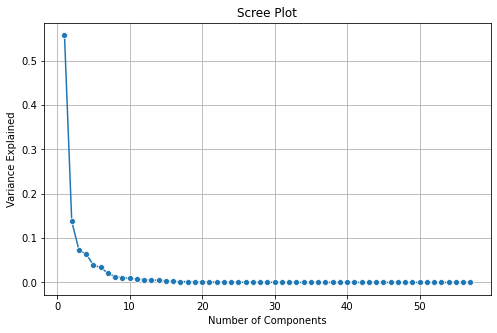

In [57]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,58),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()

In [58]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

#### #for this project, we need to consider at least 90% explained variance, so cut off for selecting the number of PCs is : '6'

#### #Part 2 - PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

In [59]:
df_pca_selected = df_pca_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6']]

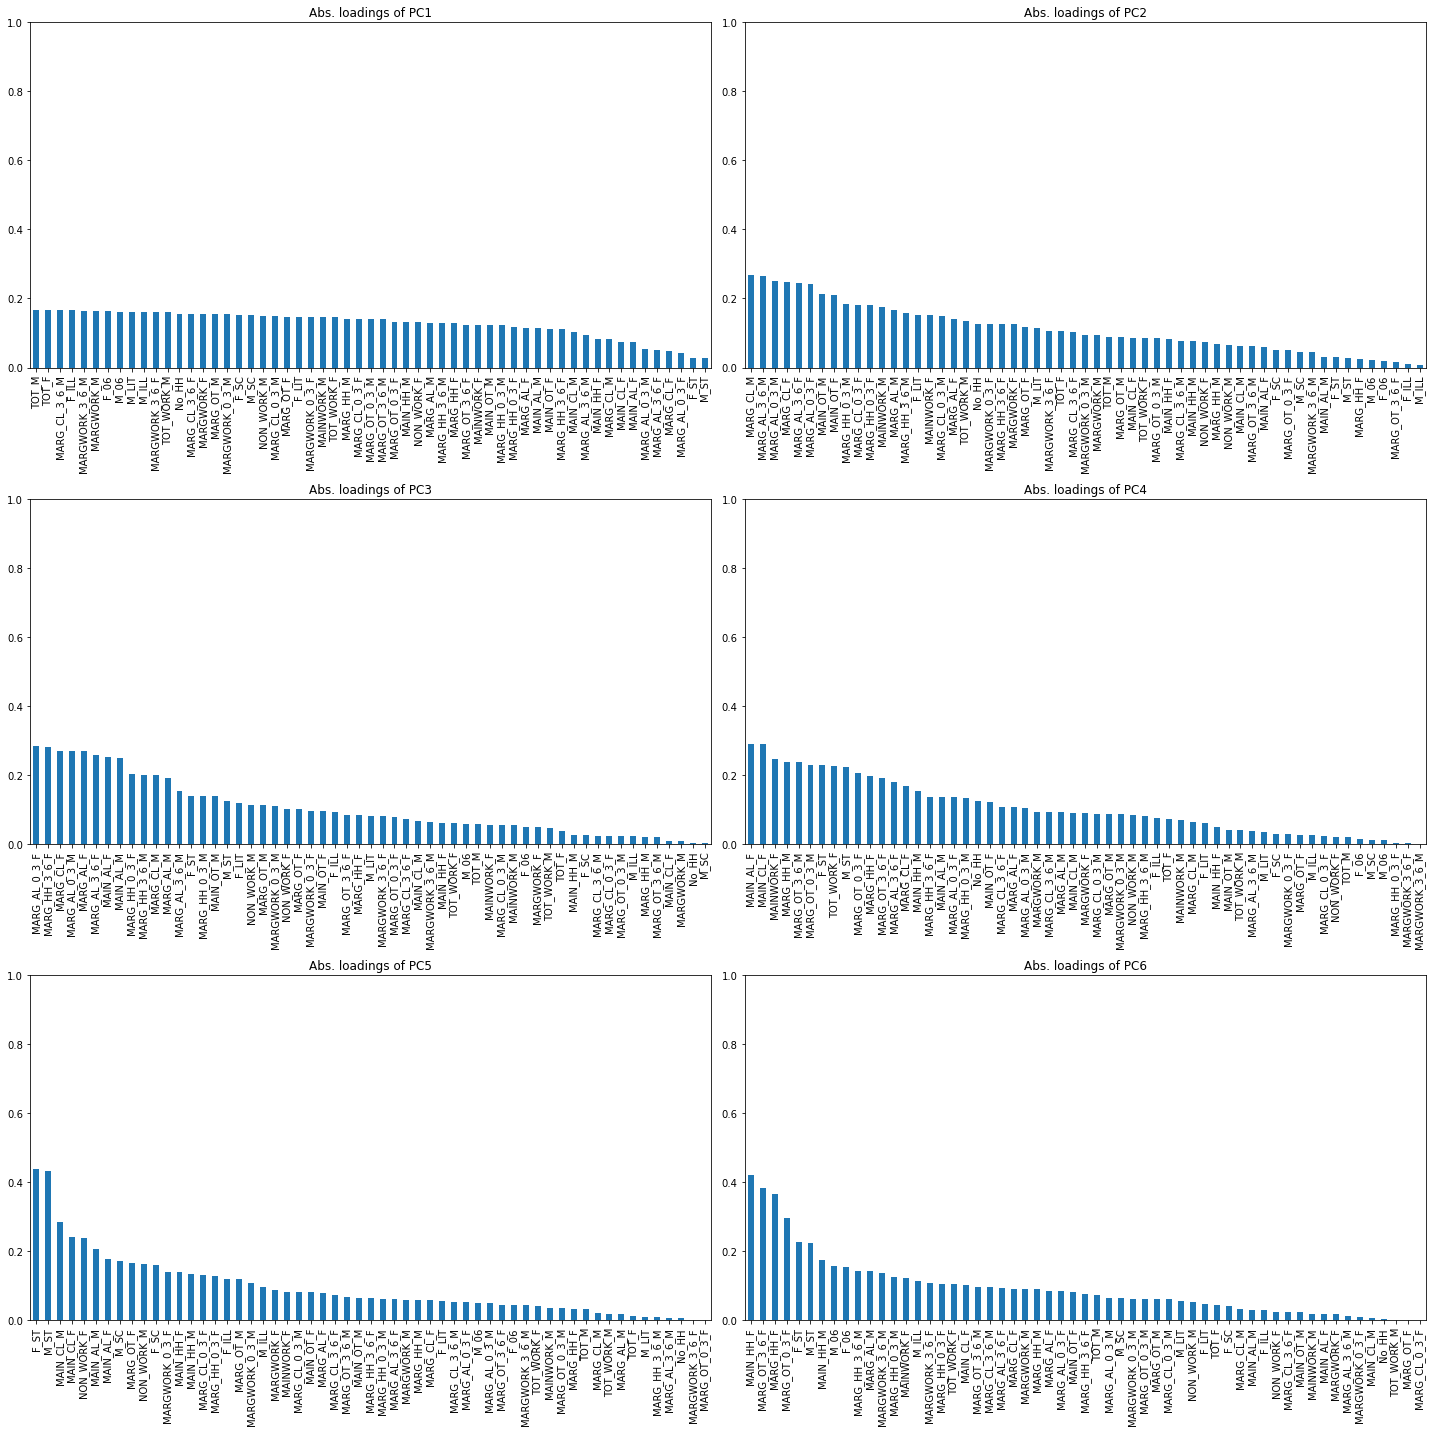

In [60]:
#Check as to how the original features matter to each PC
plt.figure(figsize = (20, 20))
for i in range(len(df_pca_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_pca_selected[df_pca_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_pca_selected.columns[i]))
    plt.tight_layout()

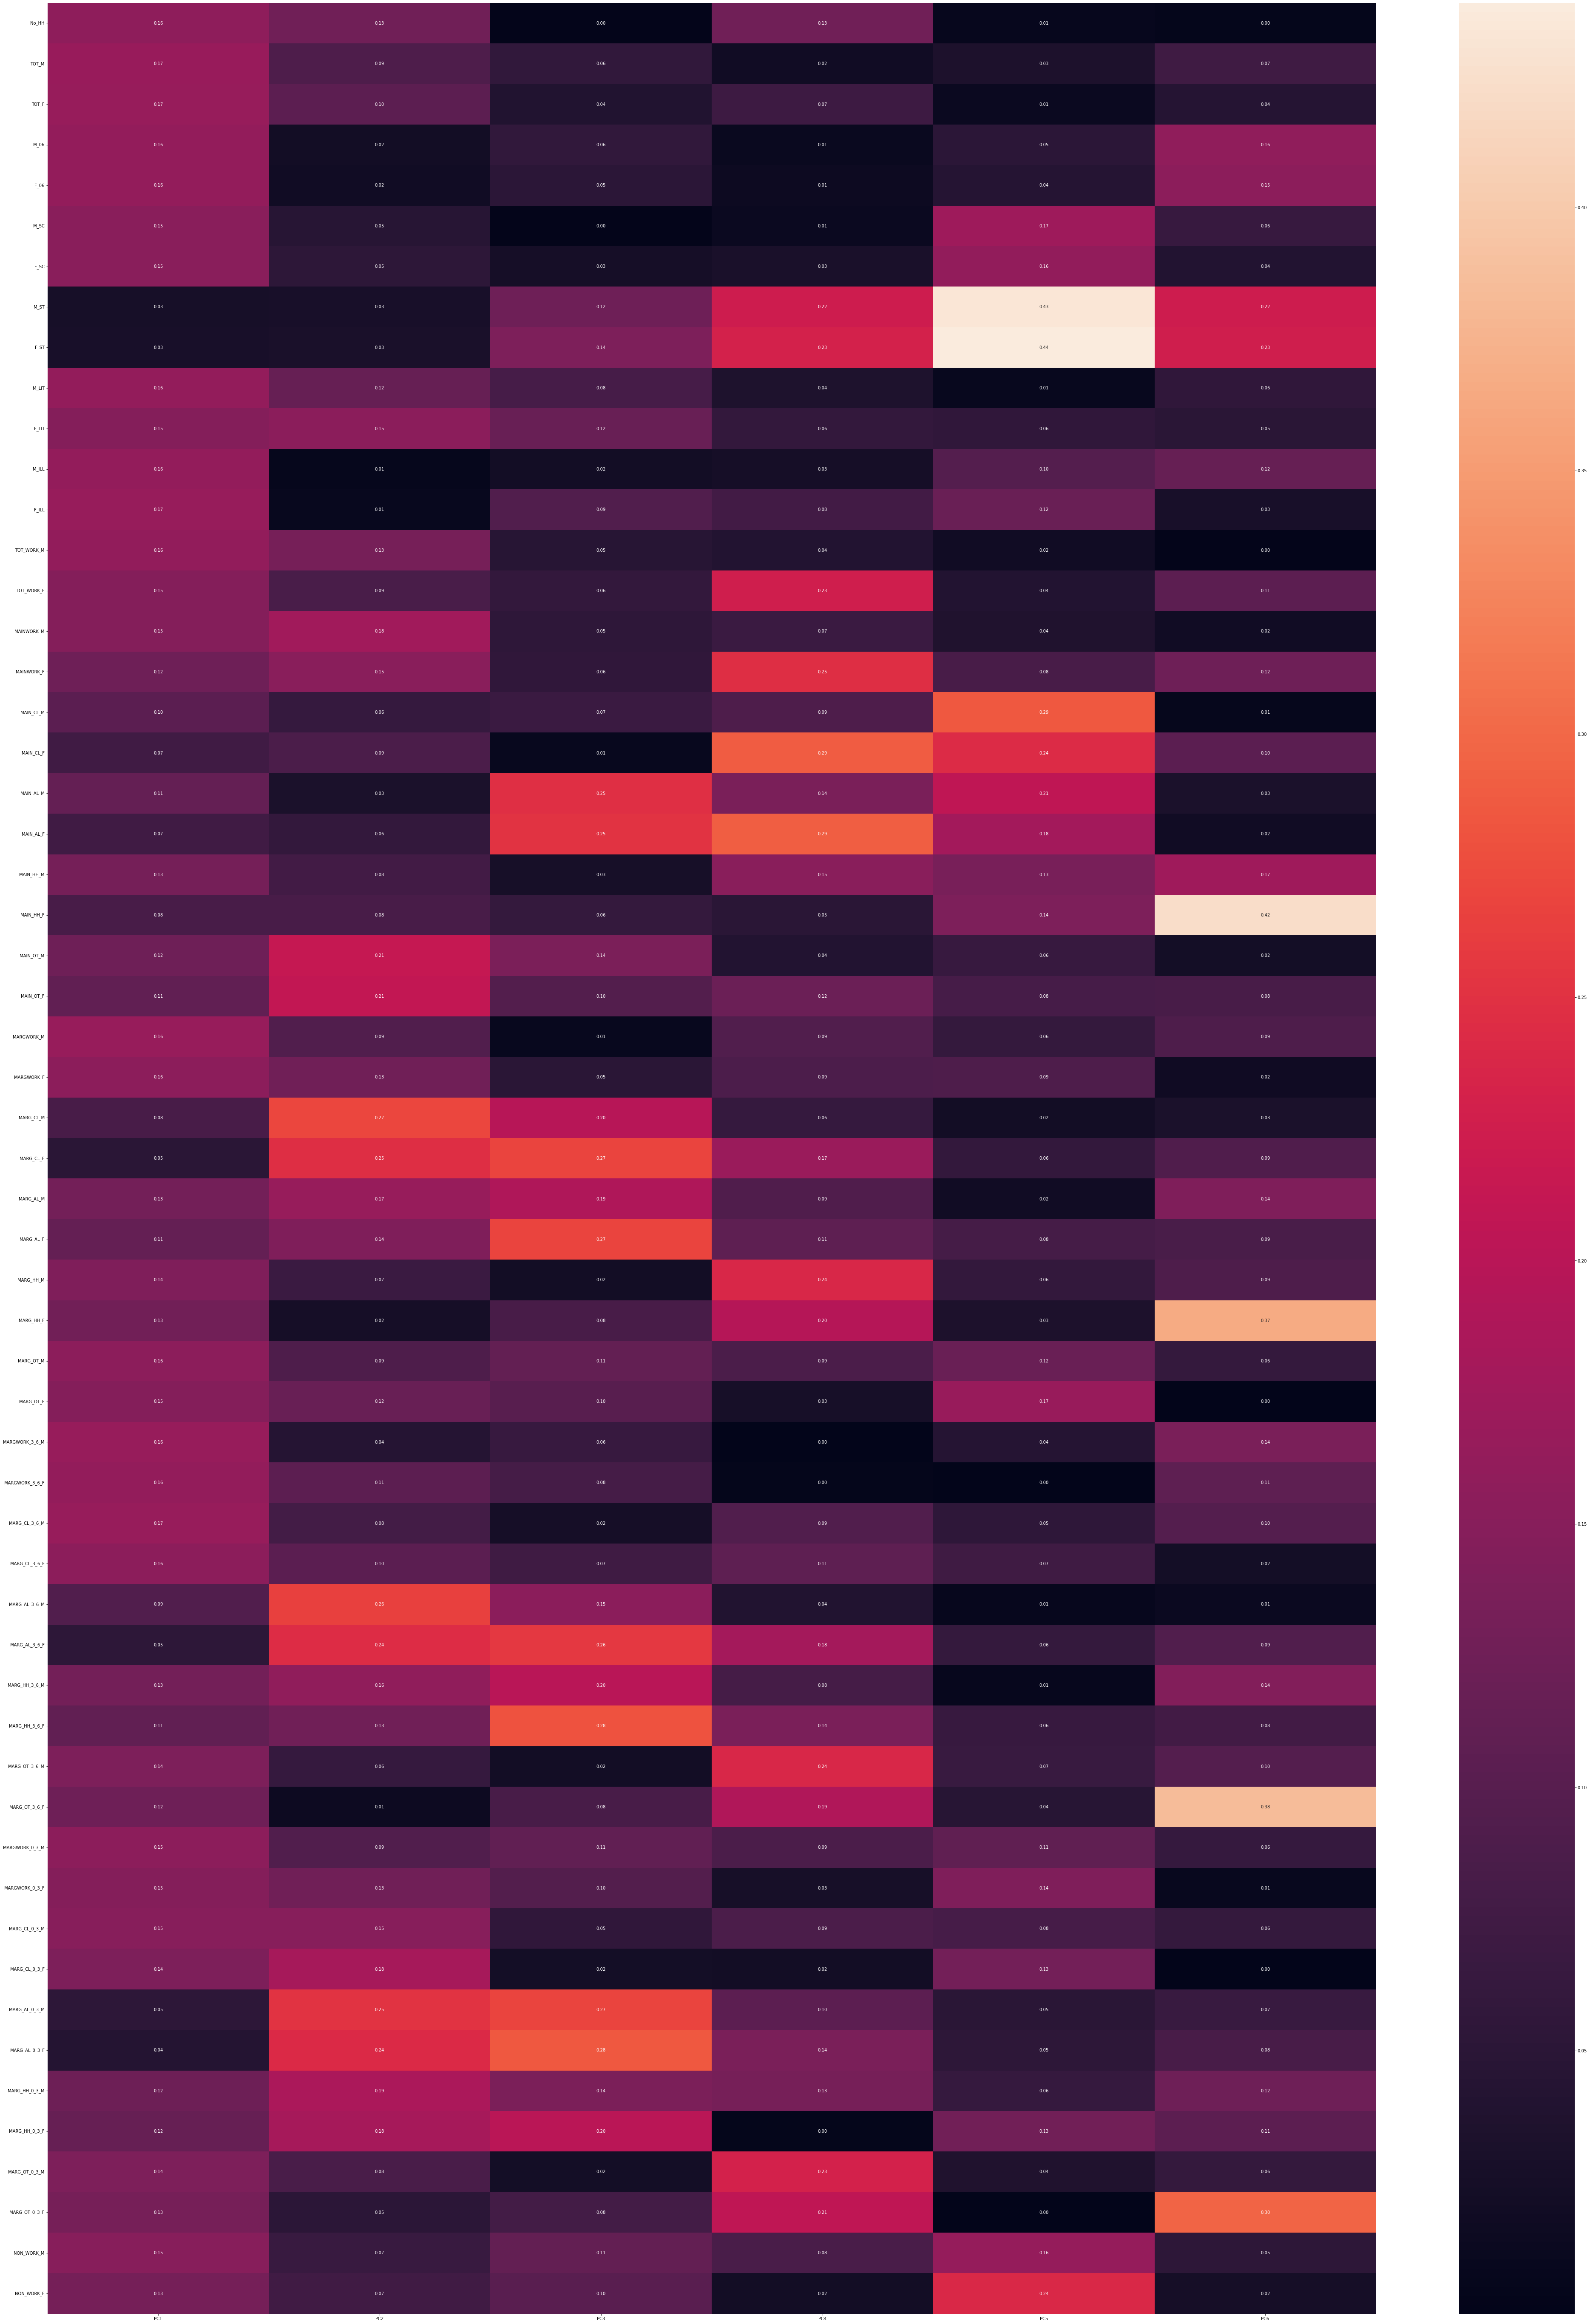

In [61]:
#Compare how the original features influence various PCs
plt.figure(figsize = (70,100))
sns.heatmap(abs(df_pca_selected), annot = True,fmt = '.2f');

In [62]:
#Extract the required number of PCs(6 in our case) :
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [63]:
pca_final_df = pd.DataFrame(pca_final, columns = df_pca_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-4.617263,0.138116,0.328545,1.543697,0.353736,-0.420948
1,-4.771662,-0.105865,0.244449,1.963215,-0.153884,0.417308
2,-5.964836,-0.294347,0.367394,0.619543,0.478199,0.276581
3,-6.280796,-0.500384,0.212701,1.074515,0.300799,0.051157
4,-4.478566,0.894154,1.078277,0.535557,0.804065,0.341678
5,-3.319963,2.823865,3.058460,-0.447904,0.742445,0.634676
6,-5.021393,-0.346359,0.650378,0.981072,-0.059778,-0.246957
7,-4.608709,0.022370,0.398755,1.576995,0.171316,-0.139444
8,-5.186703,-0.059097,0.184397,1.735440,0.169174,0.455039
9,-4.226190,-1.335080,0.697838,1.470509,0.269146,-0.002576


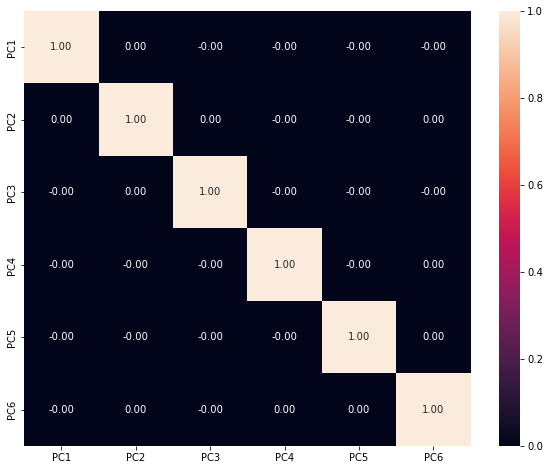

In [64]:
#Check for presence of correlations among the PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

#### #Part 2 - PCA: Write linear equation for first PC.

PC1 = a1x1 + a2x2 + a3X3 +a4X4 + …….+ a57x57